In [2]:
from asammdf import MDF, Signal
import asammdf
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline

$$ y(t) = A\sin(2 \pi f t + \varphi) = A\sin(\omega t + \varphi) $$

In [3]:
A = 1
f = 1
phi = 0

In [4]:
t = np.arange(0, 10, 1e-3, dtype=np.float32)

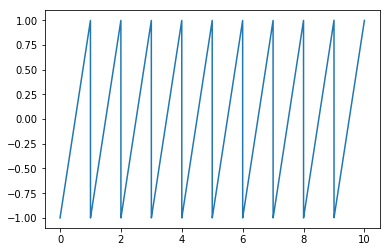

In [5]:
sawtooth_ = A*scipy.signal.sawtooth(
    2 * np.pi * f * t,
    width=1,
)
plt.plot(t, sawtooth_)

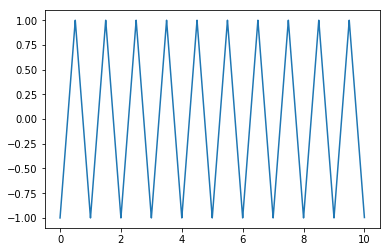

In [6]:
triangle_ = A*scipy.signal.sawtooth(
    2 * np.pi * f * t,
    width=0.5,
)
plt.plot(t, triangle_)

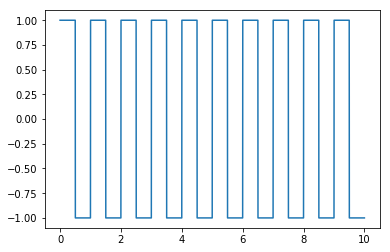

In [7]:
square_ = A*scipy.signal.square(
    2 * np.pi * f * t
)
plt.plot(t, square_)

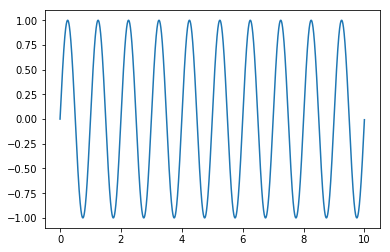

In [8]:
sine_ = A*np.sin(
    2 * np.pi * f * t
)
plt.plot(t, sine_)

In [9]:
sine = Signal(
    samples=sine_,
    timestamps=t,
    name="sine",
    unit='f8',
)
square = Signal(
    samples=square_,
    timestamps=t,
    name="square",
    unit='[unitless]',
)
sawtooth = Signal(
    samples=sawtooth_,
    timestamps=t,
    name="sawtooth",
    unit='[unitless]',
)
triangle = Signal(
    samples=triangle_,
    timestamps=t,
    name="triangle",
    unit='[unitless]',
)

In [10]:
mdf4 = MDF(
    version='4.10',
)
signals = [
    sine,
    square,
    sawtooth,
]

mdf4.append(
    signals=signals,
    source_info='Created by '+asammdf.__version__,
    common_timebase=False,
)

In [11]:
for compression in [0, 1, 2]:
    data_file = "A{A}_f{f}_c{c}".format(
        A=A,
        f=f,
        c=compression,
    )
    mdf4.save(
        dst=data_file,
        overwrite=True,
        compression=compression,
    )